# Q Evaluator
Functions for evaluating the Q polynomials at specific points.
Usage:


In [23]:
# load the datafiles
import pandas as pd
polys = pd.read_csv('data/q_to_denom_100.csv', dtype=str)

In [15]:
def eval_q_at_x(fraction, x):
    """
    Retrieves the Q polynomial of the specified fraction. Evaluates the polynomial at the given point x.
    The fraction should be passed as an array.
    """
    string_fraction = f"[{fraction[0]},{fraction[1]}]"
    p = polys[string_fraction].to_list()
    p = [int(s) for s in p]    
    # cuts off leading zeros
    i = 0
    sum = p[i]
    while sum == 0:
        i += 1
        sum += abs(p[i])
    p = p[i:]
    # evaluates polynomial
    val = 0
    for i, coeff in enumerate(p[::-1]):
        val += x**i * coeff
    return val
    

In [17]:
eval_q_at_x([1,3],6)

-5

In [41]:
import numpy as np
import matplotlib.pyplot as plt
def down_the_triangle(alpha, gamma, x):
    alpha = np.array(alpha)
    gamma = np.array(gamma)
    # print recurrence matrix for gamma
    R = np.array(
    [[1,0],
    [(-1)**(gamma[0]+1)* x**gamma[1], eval_q_at_x(gamma, x)]]
    )
    print(R)
    # print x evaluated at the polynomials alpha +n gamma
    seq = []
    for i in range(20):
        mix = alpha + gamma*i
        seq.append(eval_q_at_x(mix,x))
        print(seq[-1])
    # plot all of these points
    reals = [s.real for s in seq]
    imags = [s.imag for s in seq]
    colors = np.arange(len(seq))
    plt.scatter(reals,imags, c= colors)

[[1 0]
 [1 1]]
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181
6765


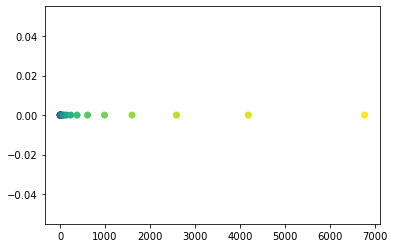

In [42]:
# from 0 to 1, the Fibonacci sequence
down_the_triangle([0,1],[1,1],1)

[[1.+0.j 0.+0.j]
 [0.+1.j 1.+0.j]]
(1+0j)
(1+0j)
(1+1j)
(1+2j)
3j
(-2+4j)
(-5+4j)
(-9+2j)
(-13-3j)
(-15-12j)
(-12-25j)
-40j
(25-52j)
(65-52j)
(117-27j)
(169+38j)
(196+155j)
(158+324j)
(3+520j)
(-321+678j)


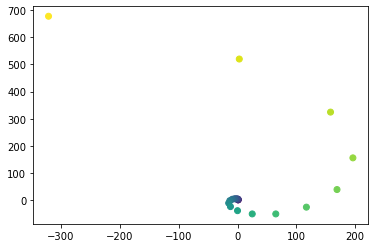

In [43]:
down_the_triangle([0,1],[1,1],0+1j)

[[ 1.+0.j  0.+0.j]
 [-0.-1.j  1.+0.j]]
(1+0j)
(1-1j)
(1-2j)
-3j
(-2-4j)
(-5-4j)
(-9-2j)
(-13+3j)
(-15+12j)
(-12+25j)
40j
(25+52j)
(65+52j)
(117+27j)
(169-38j)
(196-155j)
(158-324j)
(3-520j)
(-321-678j)
(-841-681j)


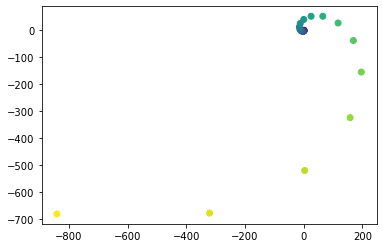

In [44]:
down_the_triangle([1,2],[0,1],0+1j)

[[ 1.+0.j  0.+0.j]
 [-1.+0.j  1.+0.j]]
(1-1j)
-1j
(-1+0j)
(-1+1j)
1j
(1+0j)
(1-1j)
-1j
(-1+0j)
(-1+1j)
1j
(1+0j)
(1-1j)
-1j
(-1+0j)
(-1+1j)
1j
(1+0j)
(1-1j)
-1j


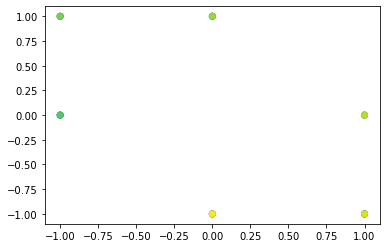

In [45]:
down_the_triangle([1,3],[1,2],0+1j)

[[ 1.+0.j  0.+0.j]
 [-1.+0.j  1.+0.j]]
(1-1j)
-1j
(-1+0j)
(-1+1j)
1j
(1+0j)
(1-1j)
-1j
(-1+0j)
(-1+1j)
1j
(1+0j)
(1-1j)
-1j
(-1+0j)
(-1+1j)
1j
(1+0j)
(1-1j)
-1j


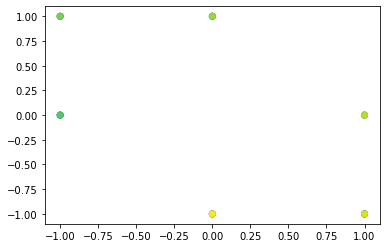

In [45]:
down_the_triangle([1,3],[1,2],0+1j)

In [46]:
import math
math.gcd(12,60)

12

(-5.0, 5.0)

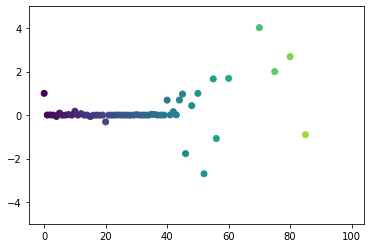

In [70]:
# plot of the antiroot function
# get all fractions with denom up to max denom in unit interval
x = 0.25j+0.5
max_denom = 100
fracs = [[0,1]]
for i in range(1,max_denom):
    g = math.gcd(i, max_denom)
    fracs.append([int(i/g),int(max_denom/g)])
ys = []
for f in fracs:
    ys.append(eval_q_at_x(f,x))
# plot all of these points
reals = [s.real for s in ys]
imags = [s.imag for s in ys]
colors = np.arange(len(ys))
plt.scatter(colors,reals, c= colors)
# plt.xlim(-1,2)
plt.ylim(-5,5)

In [71]:
np.fft.fft(ys)

array([-8.54215527e+13-5.97577133e+13j, -8.01765586e+13-6.91948512e+13j,
       -7.31025192e+13-7.78942512e+13j, -6.44436749e+13-8.52642838e+13j,
       -5.46940325e+13-9.08700788e+13j, -4.44752380e+13-9.45435825e+13j,
       -3.43765584e+13-9.63976528e+13j, -2.48274338e+13-9.67485439e+13j,
       -1.60442456e+13-9.59943648e+13j, -8.04955443e+12-9.45019892e+13j,
       -7.36936772e+11-9.25332337e+13j,  6.04841508e+12-9.02186180e+13j,
        1.24373928e+13-8.75737174e+13j,  1.84903960e+13-8.45449979e+13j,
        2.41851886e+13-8.10658032e+13j,  2.94354532e+13-7.71017806e+13j,
        3.41245606e+13-7.26727009e+13j,  3.81362207e+13-6.78519125e+13j,
        4.13723382e+13-6.27556472e+13j,  4.37610132e+13-5.75344173e+13j,
        4.52643998e+13-5.23698303e+13j,  4.58932112e+13-4.74702858e+13j,
        4.57250181e+13-4.30557134e+13j,  4.49147274e+13-3.93278947e+13j,
        4.36858964e+13-3.64348340e+13j,  4.23023583e+13-3.44447888e+13j,
        4.10322108e+13-3.33405469e+13j,  4.01192622

In [68]:
ys

[(1+0j),
 (0.001868909341328247-0.0030284838867021442j),
 (0.00797093107579272+0.002097875683091388j),
 (-0.0010534890529422876-0.0010244735773182224j),
 (-0.06271117925643921-0.05475044250488281j),
 (0.0911865234375+0.09578704833984375j),
 (-0.0050578830456196044+0.0029108248008355986j),
 (5.480170810973141e-05+5.798541926322957e-05j),
 (0.023100435733795166-0.06761550903320312j),
 (2.103568914242865e-06-1.2142143002961352e-06j),
 (0.17578125+0.28125j),
 (1.5749033518833994e-05-1.2009276820073782e-05j),
 (0.06531006097793579-0.013017654418945312j),
 (7.5332619318861096e-06+2.7857008480550105e-06j),
 (0.0009287568902074383+0.0007721307238739428j),
 (-0.067657470703125-0.01354217529296875j),
 (-0.007359921932220459+0.046749114990234375j),
 (-8.426689130986215e-06+1.2851776059669358e-05j),
 (-0.0042045207939587215-0.005119983406984829j),
 (-3.5220776265303724e-05+0.00011319738983326809j),
 (-0.3125-0.5j),
 (-3.6605319282019133e-06+7.956979354103233e-05j),
 (-0.0034002488616202697-0.00250